
# CGS Group Project: Predictive Power of Populations

**Collaborators: Josefina Waugh, Anne Bastian, Bridget Smart, Ebba Mark**

Preliminary toy model implementation of:
- Vote on binary outcome
- Voting agents endowed with personal views (pits: dynamic), information-processing function of social network, sensitivity to "global information/statistics."

In [161]:
# Import packages
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt

### Defining Agents, Classes, Functions

In [162]:
## Defining functions
# Information-processing function of social networ
#def perception(...):
#    return ...

## Defining classes
class voter:
    def __init__(vtr, 
                # The weighted adjacency matrix of the network
                neighbors,
                # Personal view - "heart" @AB
                view, 
                # To be fed into an information-processing function of their network
                # Definition (loose): your personal "parameter" for processing information about others
                sensitivity, 
                # Definition (loose): your willingness to change your opinion in the face of contradicting evidence
                # Will ideally be used to process "fact" or "news" - again, loosely defined for now
                stubbornness,
                # Definition: likelihood of casting a vote as a registered\eligible voter
                participation_propensity,
                # Their final vote
                vote, 
                prediction):
        vtr.neighbors = neighbors
        vtr.view = view
        vtr.sensitivity = sensitivity
        vtr.stubbornness = stubbornness
        vtr.participation_propensity = participation_propensity
        vtr.vote = vote
        vtr.prediction = prediction
    
    # Voting behaviour function that processes information about the 
    # public as well as 'global info' as a function of their sensitivity 
    # to other opinions in their social network as well as their stubbornness 
    # (these are likely interrelated as well...but let's ignore for now hehe)
    def refine_vote(vtr):
        vtr.vote = random.choice([0,1])
    
    def predict_cse(vtr):
        vtr.prediction = random.random()
            
class betters:
    def __init__(btr, 
                network,
                # Definition (loose): your willingness to change your opinion in the face of contradicting evidence
                # Will ideally be used to process "fact" or "news" - again, loosely defined for now
                stubbornness,
                # Number of contracts currently held
                n_contracts,
                # Their personal contract valuation
                market_valuation):
        btr.network = network
        btr.stubbornness = stubbornness
        btr.n_contracts = n_contracts
        btr.market_valuation = market_valuation
    
    # The infomation-processing function for the betters - 
    # not sure yet what parameters to include here...
    def trade(btr, network, mkt_price):
        # Some information processing to set their market_valuation
        btr.market_valuation = random.random()
        if btr.market_valuation > mkt_price:
            #buy
            btr.ncontracts =+ 1
        else:
            #sell
            btr.ncontracts =+ -1


### Adjacency Matrix

To be replaced with social network structure

In [163]:
# Toy adjacency matrix
def create_adjacency_matrix(V):
    # Initialize an empty V x V matrix with all zeros
    matrix = np.empty([V,V])
    # Populate the matrix with 0 and 1 at random
    for v in range(0,V):
        for u in range(0,V):
            edge = random.randint(0,1)
            matrix[u][v] = edge
            matrix[v][u] = edge  # Undirected graph
    return matrix


### Function to initialise voter population


In [164]:
### Function and condition to initialise voting population network
def initialise(network):
    """ Makes a list of occupations with initial conditions
       Args:
           network: input adjacency matrix of voting population
       Returns:
           list of agents
       """
    voters = []
    #ids = 0
    for i in range(0, len(network)):
        # appending relevant number of vacancies to economy-wide vacancy list
        vtr = voter(# Neighbors
                    list(network[i] > 0), 
                    # Political view
                    random.randint(0,1), 
                    # Sensitivity to new information
                    random.random(),
                    # Stubbornness
                    random.random(), 
                    # Participation propensity
                    random.random(),
                    # Vote
                    random.randint(0,1),
                    # CSE/prediction
                    random.random())
                
        voters.append(vtr)
    return voters


### Model Run

In [165]:
# Initialised voter network
voter_pop = initialise(create_adjacency_matrix(50))

## Election example
def run_election(voters, time_steps):
    record = np.array([[0,
                        # Vote
                        np.mean([vtr.vote for vtr in voters]), 
                        # CSE Prediction
                        np.mean([vtr.prediction for vtr in voters])]])
    for t in range(time_steps):
        for v in voters:
            v.refine_vote()
            v.predict_cse()
        record = np.append(record, 
                               np.array([[t+1, 
                                          # Vote outcome
                                          np.mean([vtr.vote for vtr in voters]), 
                                          # CSE rediction outcome
                                          np.mean([vtr.prediction for vtr in voters])]]), 
                               axis = 0)
    return record

election_result = run_election(voter_pop, 100)



## Results

The following graph shows time series of CSE and voter intention (true intended voting behaviour of a population) in the top panel and the difference between the two estimates in the other.

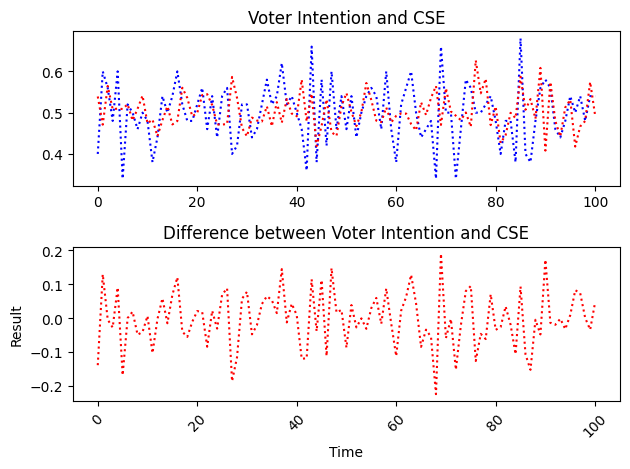

In [166]:
## Election Result
fig, ax = plt.subplots(2)
ax[0].plot(election_result[:,0], election_result[:,1], color = "blue", linestyle = "dotted")
ax[0].plot(election_result[:,0], election_result[:,2], color = "red", linestyle = "dotted")
ax[1].plot(election_result[:,0], election_result[:,1] - election_result[:,2], color = "red", linestyle = "dotted")
# Add title and axis labels
ax[0].set_title('Voter Intention and CSE')
ax[1].set_title('Difference between Voter Intention and CSE')
plt.xlabel('Time')
plt.ylabel('Result')
plt.xticks(rotation=45)
fig.tight_layout()

# Display the plot
plt.show()